<a href="https://colab.research.google.com/github/UTDataMining/2021A/blob/master/ex9/sklearn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 過学習と正則化

In [ ]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2021S/master/ex8/iris.csv

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as plt
%matplotlib inline

## 多項式による線形回帰
`scikit-learn`モジュールの`PolynomialFeatures`クラスを使うと入力の特徴量から多項や交差項の特徴量を生成することができます。多項や交差項の特徴量を導入にすることによりモデルが複雑になり、訓練データへのより柔軟な適合が可能になります。

例えば、多項式の次数としてパラメータ`degree`に2を指定すると、1変数の入力$x$に対して、1（バイアス項), $x$, $x^2$、の3つの特徴量を生成します。2変数入力$x_1, x_2$の場合は、1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$、の特徴量が生成されます。バイアス項を生成しない場合はパラメータ`include_bias`に`False`を指定します。

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

iris = pd.read_csv('iris.csv')
X=iris[['petal_length']].values # 入力X
y=iris[['petal_width']].values # 出力y

print(PolynomialFeatures(degree=2).fit_transform(X)) # 1, x, x^2、の特徴量

[[ 1.    1.4   1.96]
 [ 1.    1.4   1.96]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.7   2.89]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.5   2.25]
 [ 1.    1.6   2.56]
 [ 1.    1.4   1.96]
 [ 1.    1.1   1.21]
 [ 1.    1.2   1.44]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.4   1.96]
 [ 1.    1.7   2.89]
 [ 1.    1.5   2.25]
 [ 1.    1.7   2.89]
 [ 1.    1.5   2.25]
 [ 1.    1.    1.  ]
 [ 1.    1.7   2.89]
 [ 1.    1.9   3.61]
 [ 1.    1.6   2.56]
 [ 1.    1.6   2.56]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.6   2.56]
 [ 1.    1.6   2.56]
 [ 1.    1.5   2.25]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.2   1.44]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.3   1.69]
 [ 1.    1.3   1.69]
 [ 1.    1.6   2.56]
 [ 1.    1.9   3.61]
 [ 1.    1.4   1.96]
 [ 1.    1.6   2.56]
 [ 1.    1.4 

以下の関数`iris_poly_regression()`では、課題8で用いたirisデータセットの特徴量`petal_length`から引数`n`の次数の多項式の特徴量を生成し、それらの特徴量を用いて線形回帰（`LinearRegression`）により特徴量`petal_width`を予測するモデルを学習しています。

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

データセットは`tran_test_split`関数を使って、70%をモデル学習の訓練データ、30%をモデル評価のテストデータに分割しています。

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

モデル評価は平均二乗誤差（`mean_squared_error`）で行います。

[mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def iris_poly_regression(n):
    # 引数 n: 多項式の次数 

    iris = pd.read_csv('iris.csv')
    X=iris[['petal_length']].values # 入力X
    y=iris[['petal_width']].values # 出力y

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # 入力からn次多項式の特徴量を生成
    # バイアス項はLinearRegression内で作成されるのでFalse
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    model=LinearRegression(normalize=True) # normalize=Trueで各特徴量を標準化
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train=model.predict(poly_X_train)
    train_loss =mean_squared_error(y_train,y_predicted_train)
    print('Train Loss', train_loss)

    # テストデータ誤差
    y_predicted_test=model.predict(poly_X_test) 
    test_loss = mean_squared_error(y_test,y_predicted_test)
    print('Test Loss', test_loss)

    #パラメータ
    #print(model.intercept_)
    #print(model.coef_)

    # 曲線描画用のデータポイント
    X_point=np.arange(X.min(),X.max(),0.1)[:,np.newaxis]
    y_point=model.predict(poly.fit_transform(X_point))

    plt.figure(figsize=(7,5))
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.scatter(X_train, y_train,c='blue') # 訓練データ
    plt.scatter(X_test, y_test,c='green') # テストデータ
    plt.plot(X_point, y_point, color='red');
    
    return train_loss, test_loss

多項式の次数$n$を変化させて、入力（petal_lengthの値）と出力（入力から予測されたpetal_widthの値）の対応がどのように変化するか、特に次数が大きくなり学習モデルが複雑になると訓練データ（青のデータポイント）に適合しすぎてしまう過学習が起こることを観察してください。

Train Loss 0.037464337295963115
Test Loss 0.0536470856777113


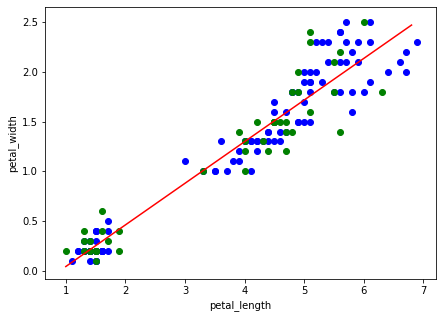

In [ ]:
train_loss, test_loss = iris_poly_regression(1)

Train Loss 0.03183826195559588
Test Loss 0.05068490214292465


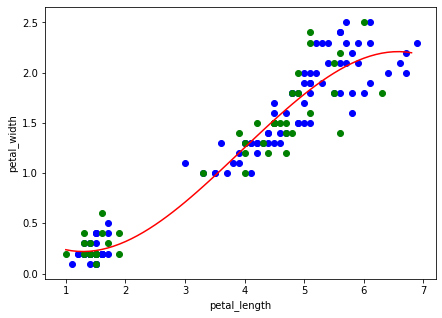

In [ ]:
train_loss, test_loss = iris_poly_regression(3)

Train Loss 0.025839500758191743
Test Loss 0.05206682681749028


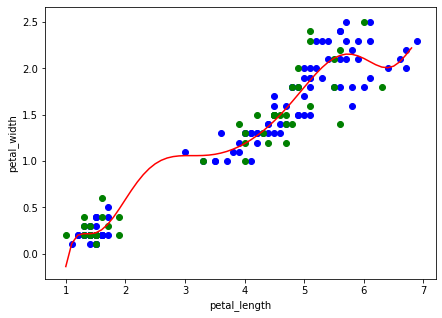

In [ ]:
train_loss, test_loss = iris_poly_regression(10)

多項式の次数を1から10まで変化させた時の訓練データとテストデータの誤差の変化をプロットする以下の処理を完成させてください。

完成したらセルを実行し、多項式の次数が大きくなると、訓練データとテストデータの誤差はそれぞれどのように変化するか観察してください。特に、次数が大きくなると訓練データの誤差が減少していきますが、テストデータの誤差は必ずしも減少しないことも確認してください。

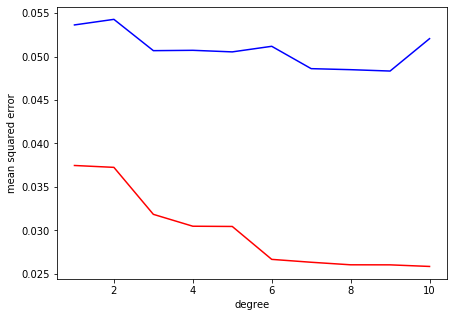

In [ ]:
degree=np.arange(1,11) # 次数(1から10)
train_curve=[] # 各次数の訓練データ誤差のリスト
test_curve=[] # 各次数のテストデータ誤差のリスト

iris = pd.read_csv('iris.csv')
X=iris[['petal_length']].values # 入力X
y=iris[['petal_width']].values # 出力y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for n in degree:
    # 入力からn次多項式の特徴量を生成
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    model=LinearRegression(normalize=True) # normalize=Trueで各特徴量を標準化
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train = model.predict(poly_X_train) ###訓練データ入力に対する出力を計算するコード###
    train_loss = mean_squared_error(y_train,y_predicted_train) ### 訓練データの誤差を計算するコード ###
    train_curve.append(train_loss) ### train_curveにtrain_lossを追加するコード ###

    # テストデータ誤差
    y_predicted_test = model.predict(poly_X_test) ###テストデータ入力に対する出力を計算するコード###
    test_loss = mean_squared_error(y_test,y_predicted_test) ### テストデータの誤差を計算するコード ###
    test_curve.append(test_loss) ### test_curveにtest_lossを追加するコード ###
    
plt.figure(figsize=(7,5))
plt.xlabel('degree')
plt.ylabel('mean squared error')    
plt.plot(degree, train_curve, color='red'); # 訓練データ誤差曲線
plt.plot(degree, test_curve, color='blue'); # テストデータ誤差曲線

## リッジ回帰
以下では、学習モデルとして`LinearRegression`の代わりに`Ridge`（リッジ回帰）を使っています。`Ridge`クラスは、$L_2$ノルムを正則化に用いた線形回帰モデルで学習を行うことができます。パラメータ`alpha`に正則化項の係数（講義資料中の$\lambda$）を指定します。

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

多項式回帰で観察した過学習が、正則化により抑えられていることを観察してください。また、正則化項の係数のハイパーパラメータを変化させた時（例えば、0.01, 0.1, 1, 10など）、入力（`petal_length`の値）と出力（入力から予測された`petal_width`の値）の対応がどのように変化するかその時の誤差の値とともに観察してください。正則化項の係数を大きするとアンダーフィッティングが起こることを確認してください。

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

def iris_poly_ridge(n, a):
    # 引数 n: 多項式の次数 
    # 引数 a: 正則化項の係数

    iris = pd.read_csv('iris.csv')
    X=iris[['petal_length']].values # 入力X
    y=iris[['petal_width']].values # 出力y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # 入力からn次多項式の特徴量を生成
    # バイアス項はLinearRegression内で作成されるのでFalse
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    # リッジ回帰モデル（aは正則化項の係数）
    model=Ridge(alpha=a, normalize=True)
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train=model.predict(poly_X_train)
    train_loss =mean_squared_error(y_train,y_predicted_train)
    print('Train Loss', train_loss)

    # テストデータ誤差
    y_predicted_test=model.predict(poly_X_test) 
    test_loss = mean_squared_error(y_test,y_predicted_test)
    print('Test Loss', test_loss)

    #パラメータ
    #print(model.intercept_)
    #print(model.coef_)

    # 曲線描画用のデータポイント
    X_point=np.arange(X.min(),X.max(),0.1)[:,np.newaxis]
    y_point=model.predict(poly.fit_transform(X_point))
    
    plt.figure(figsize=(7,5))
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.scatter(X_train, y_train,c='blue') # 訓練データ
    plt.scatter(X_test, y_test,c='green') # テストデータ
    plt.plot(X_point, y_point, color='red');
    
    return train_loss, test_loss

Train Loss 0.037519954231667145
Test Loss 0.05343759817919628


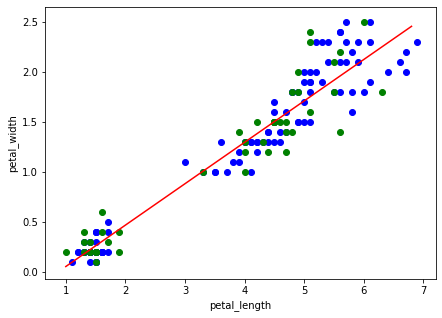

In [ ]:
train_loss, test_loss = iris_poly_ridge(1, 0.01)

Train Loss 0.036714260570738094
Test Loss 0.05292895964274187


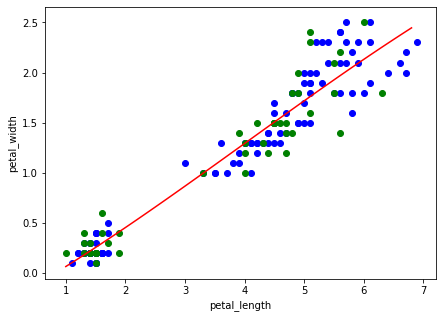

In [ ]:
train_loss, test_loss = iris_poly_ridge(3, 0.01)

Train Loss 0.03077150481397505
Test Loss 0.050220024719331235


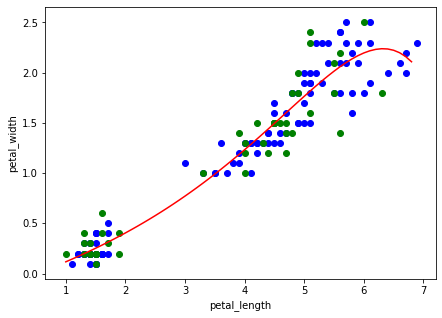

In [ ]:
train_loss, test_loss = iris_poly_ridge(10, 0.01)

上記のリッジ回帰で多項式の次数を1から10まで変化させた時の訓練データとテストデータの誤差の変化をプロットする以下の処理を完成させてください。その際、正則化項の係数は0.01など適当な値に固定してください。

完成したらセルを実行し、多項式の次数が大きくなると、訓練データとテストデータの誤差はそれぞれどのように変化するか観察してください。

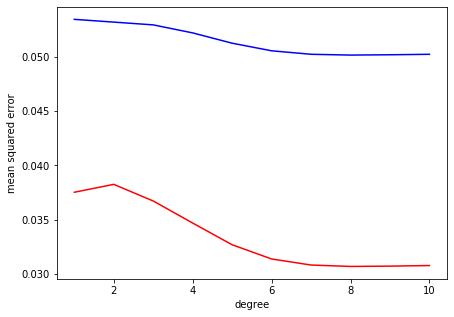

In [ ]:
### 上記のリッジ回帰で多項式の次数を1から10まで変化させた時の
### 訓練データとテストデータの誤差の変化曲線を表示するコード 

degree=np.arange(1,11) # 次数(1から10)
train_curve=[] # 各次数の訓練データ誤差のリスト
test_curve=[] # 各次数のテストデータ誤差のリスト

iris = pd.read_csv('iris.csv')
X=iris[['petal_length']].values # 入力X
y=iris[['petal_width']].values # 出力y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for n in degree:
    # 入力からn次多項式の特徴量を生成
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    model =  Ridge(alpha=0.01, normalize=True) # normalize=Trueで各特徴量を標準化
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train = model.predict(poly_X_train) ###訓練データ入力に対する出力を計算するコード###
    train_loss = mean_squared_error(y_train,y_predicted_train) ### 訓練データの誤差を計算するコード ###
    train_curve.append(train_loss) ### train_curveにtrain_lossを追加するコード ###

    # テストデータ誤差
    y_predicted_test = model.predict(poly_X_test) ###テストデータ入力に対する出力を計算するコード###
    test_loss = mean_squared_error(y_test,y_predicted_test) ### テストデータの誤差を計算するコード ###
    test_curve.append(test_loss) ### test_curveにtest_lossを追加するコード ###
    
plt.figure(figsize=(7,5))
plt.xlabel('degree')
plt.ylabel('mean squared error')    
plt.plot(degree, train_curve, color='red'); # 訓練データ誤差曲線
plt.plot(degree, test_curve, color='blue'); # テストデータ誤差曲線
